In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [21]:
def load_house_data():
    data = np.loadtxt("houses.txt", delimiter=',', skiprows=1)
    X = data[:,:4]
    y = data[:,4]
    return X, y


In [25]:
X_train, y_train = load_house_data()
print("X_train : {}".format(X_train[0]))
print("y_train : {}".format(y_train[0]))
X_features = ["size(sqft)", "bedrooms", "floors", "age"]

X_train : [1.244e+03 3.000e+00 1.000e+00 6.400e+01]
y_train : 300.0


# scale/normalize

In [41]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

print(f"Normalize yapılmamış hali            X: {X_train[0]}")
print(f"Normalize yapılmış hali              X: {X_norm[0]}")

Peak to Peak range by column in Raw        X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X:[5.8452591  6.13529646 2.05626214 3.68533012]
Normalize yapılmamış hali            X: [1.244e+03 3.000e+00 1.000e+00 6.400e+01]
Normalize yapılmış hali              X: [-0.42363245  0.43380884 -0.78927234  0.99372644]


# regression

In [42]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 131, number of weight updates: 12970.0


# ağırlık ve bias değerleri

In [45]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [110.19703568 -21.13203916 -32.57344455 -38.0313288 ], b:[363.16024914]


# tahmin yapma

In [52]:
y_pred_sgd = sgdr.predict(X_norm) # sgdr kütüphanesi ile tahmin
y_pred = np.dot(X_norm, w_norm) + b_norm # değerleri formülde yerine koyarak tahmin

print(f"kütüphane tahmini ile formül tahmini aynı çıktı mı: {(y_pred_sgd == y_pred).all()}")

print(f"Tahminler: \n{y_pred[:4]}")

print(f"Veri setindeki gerçek değerler: \n{y_train[:4]}")

kütüphane tahmini ile formül tahmini aynı çıktı mı: True
Tahminler: 
[295.22652518 485.79427507 389.4771283  491.95758941]
Veri setindeki gerçek değerler: 
[300.  509.8 394.  540. ]


# grafiğe dökme

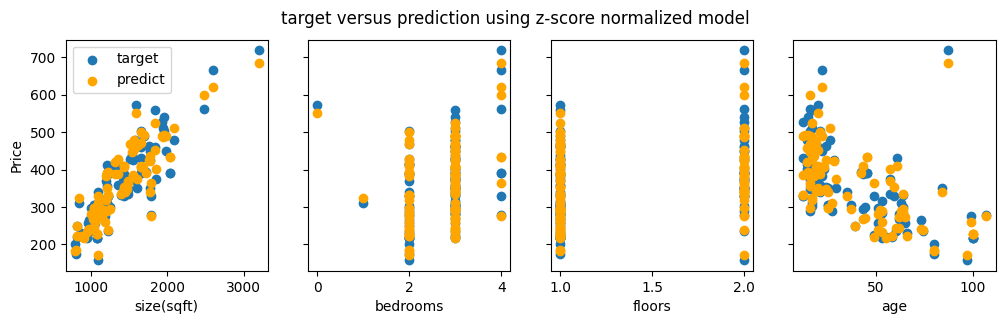

In [56]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

# -----------------------------------------------------

In [59]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

### load data

In [60]:
X_train = np.array([1.0, 2.0]) 
y_train = np.array([300, 500])


### create and fit the model

In [61]:
linear_model = LinearRegression()
# x'in 2 boyutlu bir matris olması gerekiyor
linear_model.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

### view parameters

In [62]:
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}, b = {b:0.2f}")
print(f"formülde yerine koyarak tahmin f_wb = wx+b : {1200*w + b}")

w = [200.], b = 100.00
formülde yerine koyarak tahmin f_wb = wx+b : [240100.]


### prediction

In [69]:
y_pred = linear_model.predict(X_train.reshape(-1, 1))

print(f"kütüphane ile tahmin sonucu: {y_pred}")

X_test = np.array([[1200]]) #2-D

print(f"1200metrekarelik evin fiyat tahmini: ${linear_model.predict(X_test)[0]:0.2f}")

kütüphane ile tahmin sonucu: [300. 500.]
1200metrekarelik evin fiyat tahmini: $240100.00


### ------------------------- second example --------------------------

In [70]:
X_train, y_train = load_house_data()
X_features = ["size", "bedrooms", "floors", "age"]

In [71]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [75]:
b = linear_model.intercept_
w = linear_model.coef_
print(f"w: {w}, b: {b:0.2f}")

w: [  0.26860107 -32.62006902 -67.25453872  -1.47297443], b: 220.42


In [80]:
print(f"Prediction on training set:\n {linear_model.predict(X_train)[:4]}" )
print(f"prediction using w,b:\n {(X_train @ w + b)[:4]}")
print(f"Target values \n {y_train[:4]}")

x_house = np.array([1200, 3,1, 40]).reshape(-1,4)
x_house_predict = linear_model.predict(x_house)[0]
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.2f}")

Prediction on training set:
 [295.17615301 485.97796332 389.52416548 492.14712499]
prediction using w,b:
 [295.17615301 485.97796332 389.52416548 492.14712499]
Target values 
 [300.  509.8 394.  540. ]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318709.09


In [88]:
print(f"formülle tahmin: {(np.dot(x_house, w) + b)*1000}")

formülle tahmin: [318709.09232]
